# Assignment Logistics Regression

Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
bank = pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


In [3]:
#Shape of the data set
bank.shape

(45211, 17)

In [4]:
# check types for all columns
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# All the columns name
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# this command given numpy array without any index or columns names
bank.values

array([[95, 'retired', 'married', ..., 0, 'unknown', 'no'],
       [95, 'retired', 'divorced', ..., 0, 'unknown', 'yes'],
       [94, 'retired', 'divorced', ..., 0, 'unknown', 'no'],
       ...,
       [18, 'student', 'single', ..., 1, 'success', 'yes'],
       [18, 'student', 'single', ..., 0, 'unknown', 'yes'],
       [18, 'student', 'single', ..., 0, 'unknown', 'no']], dtype=object)

In [7]:
#command given Descriptive statistics for numerical columns only.
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# command given index dtype and column dtypes, non-null values and memory usage.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# This method gives us very nice descriptive statistics.
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# correlation matrix
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


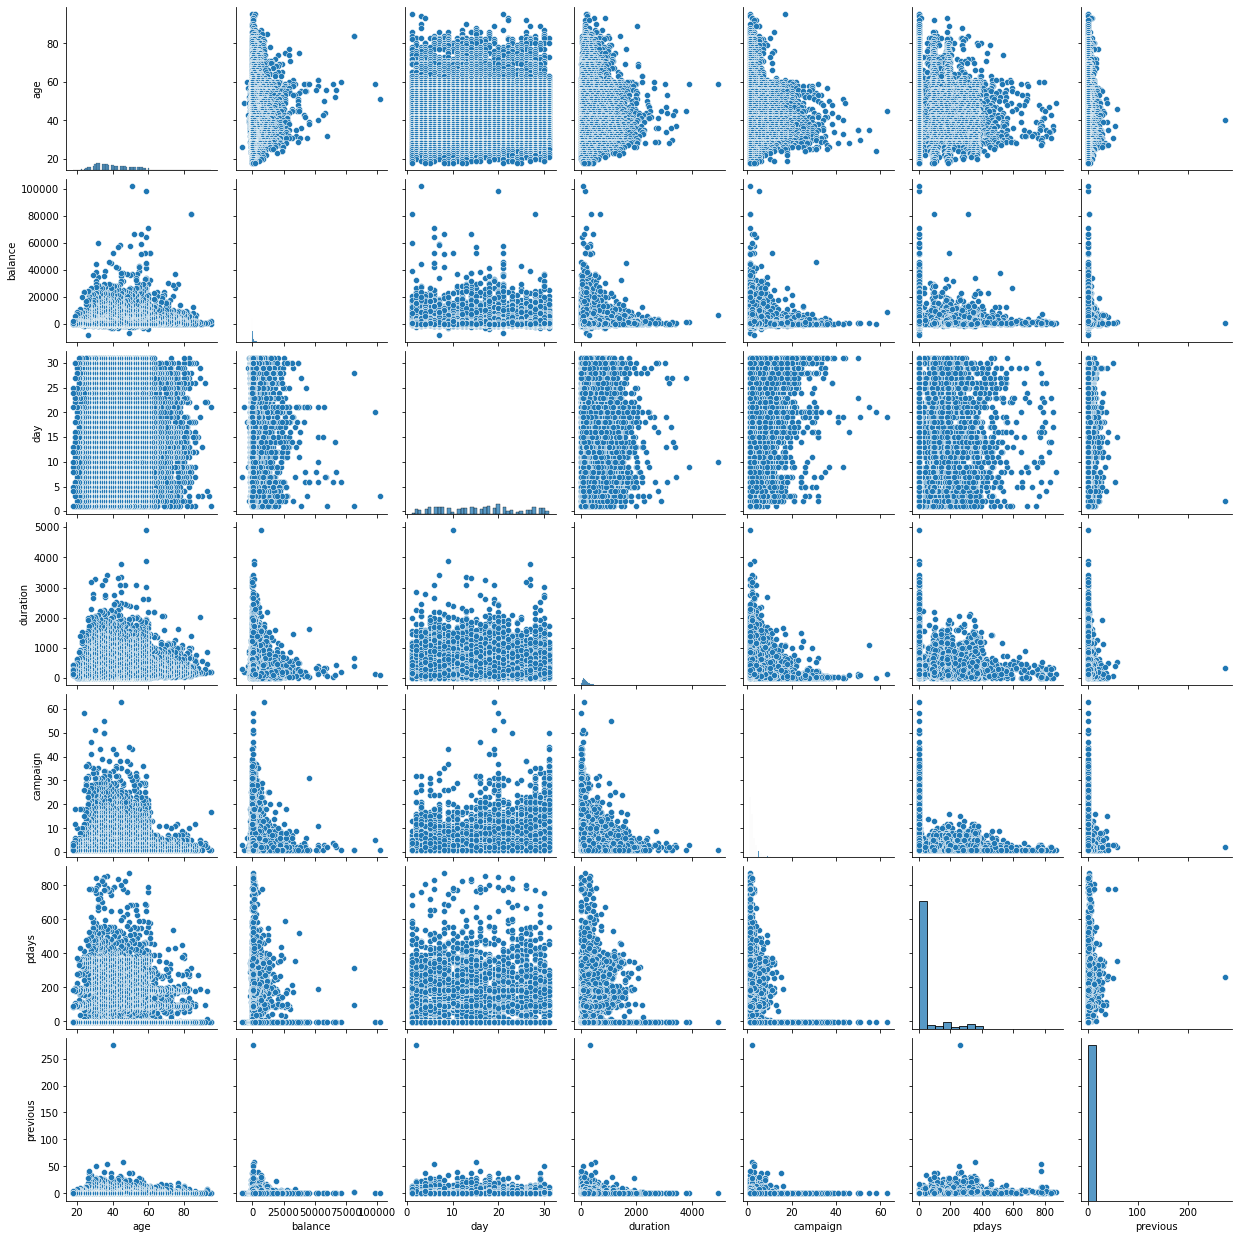

In [11]:
sns.pairplot(bank)

In [12]:
# replace all no entries with 0, and all yes entries with 1
bank1=bank.copy()
bank1['y']=bank1['y'].map({'yes':1,'no':0})
bank1['housing']=bank1['housing'].map({'yes':1,'no':0})
bank1['default']=bank1['default'].map({'yes':1,'no':0})
bank1['loan']=bank1['loan'].map({'yes':1,'no':0})
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,0,0,0,0,telephone,1,oct,215,1,-1,0,unknown,0
1,95,retired,divorced,primary,0,2282,0,0,telephone,21,apr,207,17,-1,0,unknown,1
2,94,retired,divorced,secondary,0,1234,0,0,cellular,3,mar,212,1,-1,0,unknown,0
3,93,retired,married,unknown,0,775,0,0,cellular,4,aug,476,2,13,9,success,1
4,93,retired,married,unknown,0,775,0,0,cellular,22,jul,860,2,177,7,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,student,single,secondary,0,5,0,0,cellular,24,aug,143,2,-1,0,unknown,0
45207,18,student,single,secondary,0,156,0,0,cellular,4,nov,298,2,82,4,other,0
45208,18,student,single,primary,0,608,0,0,cellular,13,nov,210,1,93,1,success,1
45209,18,student,single,primary,0,608,0,0,cellular,12,aug,267,1,-1,0,unknown,1


In [13]:
## One-Hot Encoding of categrical variables
bank2= pd.get_dummies(bank1,columns=['job','marital','education','contact','month','poutcome'])
bank2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,95,0,0,0,0,1,215,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,95,0,2282,0,0,21,207,17,-1,0,...,0,0,0,0,0,0,0,0,0,1
2,94,0,1234,0,0,3,212,1,-1,0,...,0,1,0,0,0,0,0,0,0,1
3,93,0,775,0,0,4,476,2,13,9,...,0,0,0,0,0,0,0,0,1,0
4,93,0,775,0,0,22,860,2,177,7,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,0,5,0,0,24,143,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
45207,18,0,156,0,0,4,298,2,82,4,...,0,0,0,1,0,0,0,1,0,0
45208,18,0,608,0,0,13,210,1,93,1,...,0,0,0,1,0,0,0,0,1,0
45209,18,0,608,0,0,12,267,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#data types and missing value
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [15]:
# check for missing value
bank2.isna().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0


In [16]:
# To see all columns
pd.set_option("display.max.columns", None)
bank2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,95,0,0,0,0,1,215,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,95,0,2282,0,0,21,207,17,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94,0,1234,0,0,3,212,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,93,0,775,0,0,4,476,2,13,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,93,0,775,0,0,22,860,2,177,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45207,18,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
45208,18,0,608,0,0,13,210,1,93,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,18,0,608,0,0,12,267,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# Dividing our data into input and output variables
x=pd.concat([bank2.iloc[:,0:10],bank2.iloc[:,11:]],axis=1)
y=bank2.iloc[:,10]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_train, y_train)

In [20]:
## logistics regression and fit the model
classifier=LogisticRegression()
classifier.fit(x_res,y_res)

LogisticRegression()

In [21]:
## predict for x dataset
y_pred=classifier.predict(x_test)

In [22]:
classifier.predict_proba(x_test)

array([[0.95454275, 0.04545725],
       [0.96449007, 0.03550993],
       [0.90355702, 0.09644298],
       ...,
       [0.87498397, 0.12501603],
       [0.07561739, 0.92438261],
       [0.93550565, 0.06449435]])

In [23]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':classifier.predict(x)})
y_pred_df

,actual_y,y_pred_prob
0,0,1
1,1,0
2,0,1
3,1,1
4,1,1
...,...,...
45206,0,0
45207,0,0
45208,1,1
45209,1,0


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
## Confusion Matrix for the model accuracy
confusion_matrix(y_test,y_pred)

array([[11003,   943],
       [  763,   855]], dtype=int64)

In [26]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(11006+853)/(11006+853+940+765)

0.8742996166322619

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8742258920672368

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11946
           1       0.48      0.53      0.50      1618

    accuracy                           0.87     13564
   macro avg       0.71      0.72      0.71     13564
weighted avg       0.88      0.87      0.88     13564



In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


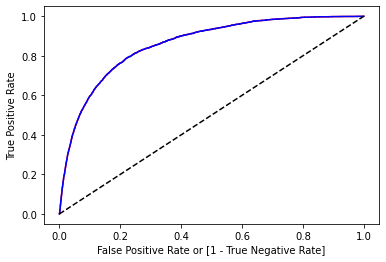

auc accuracy: 0.7247458019265516


In [30]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [31]:
auc

0.7247458019265516

In [32]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.99899805e-01, 9.99899805e-01, 1.00000000e+00])

In [33]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [34]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99999998e-01, ...,
       3.74594456e-08, 3.20344328e-08, 3.60488623e-35])